# Regression
Nous allons comparer 5 algorhitmes de régression afin de predire le score de progression d'un diabète. \
modèle utilisé:
* Regression linéaire
* Decision Tree
* Random Forest
* Lasso
* Gradient Boosting
## Imports

In [2]:
#manipulation de données
import pandas as pd
import numpy as np
#visualisation de données
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#outils ML 
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split 

#modèles ML 
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

#métriques 
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score)

## Chargement et préparation des données 

In [6]:
#chargement du dataset
bunch = load_diabetes()
#df pour les features 
X = pd.DataFrame(bunch.data, columns=bunch.feature_names)
#serie pour la target
y = pd.Series(bunch.target, name='disease_progression')
#concaténation des features et de la target 
df = pd.concat([X,y], axis=1)

## Exploration des données

In [7]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


<Axes: >

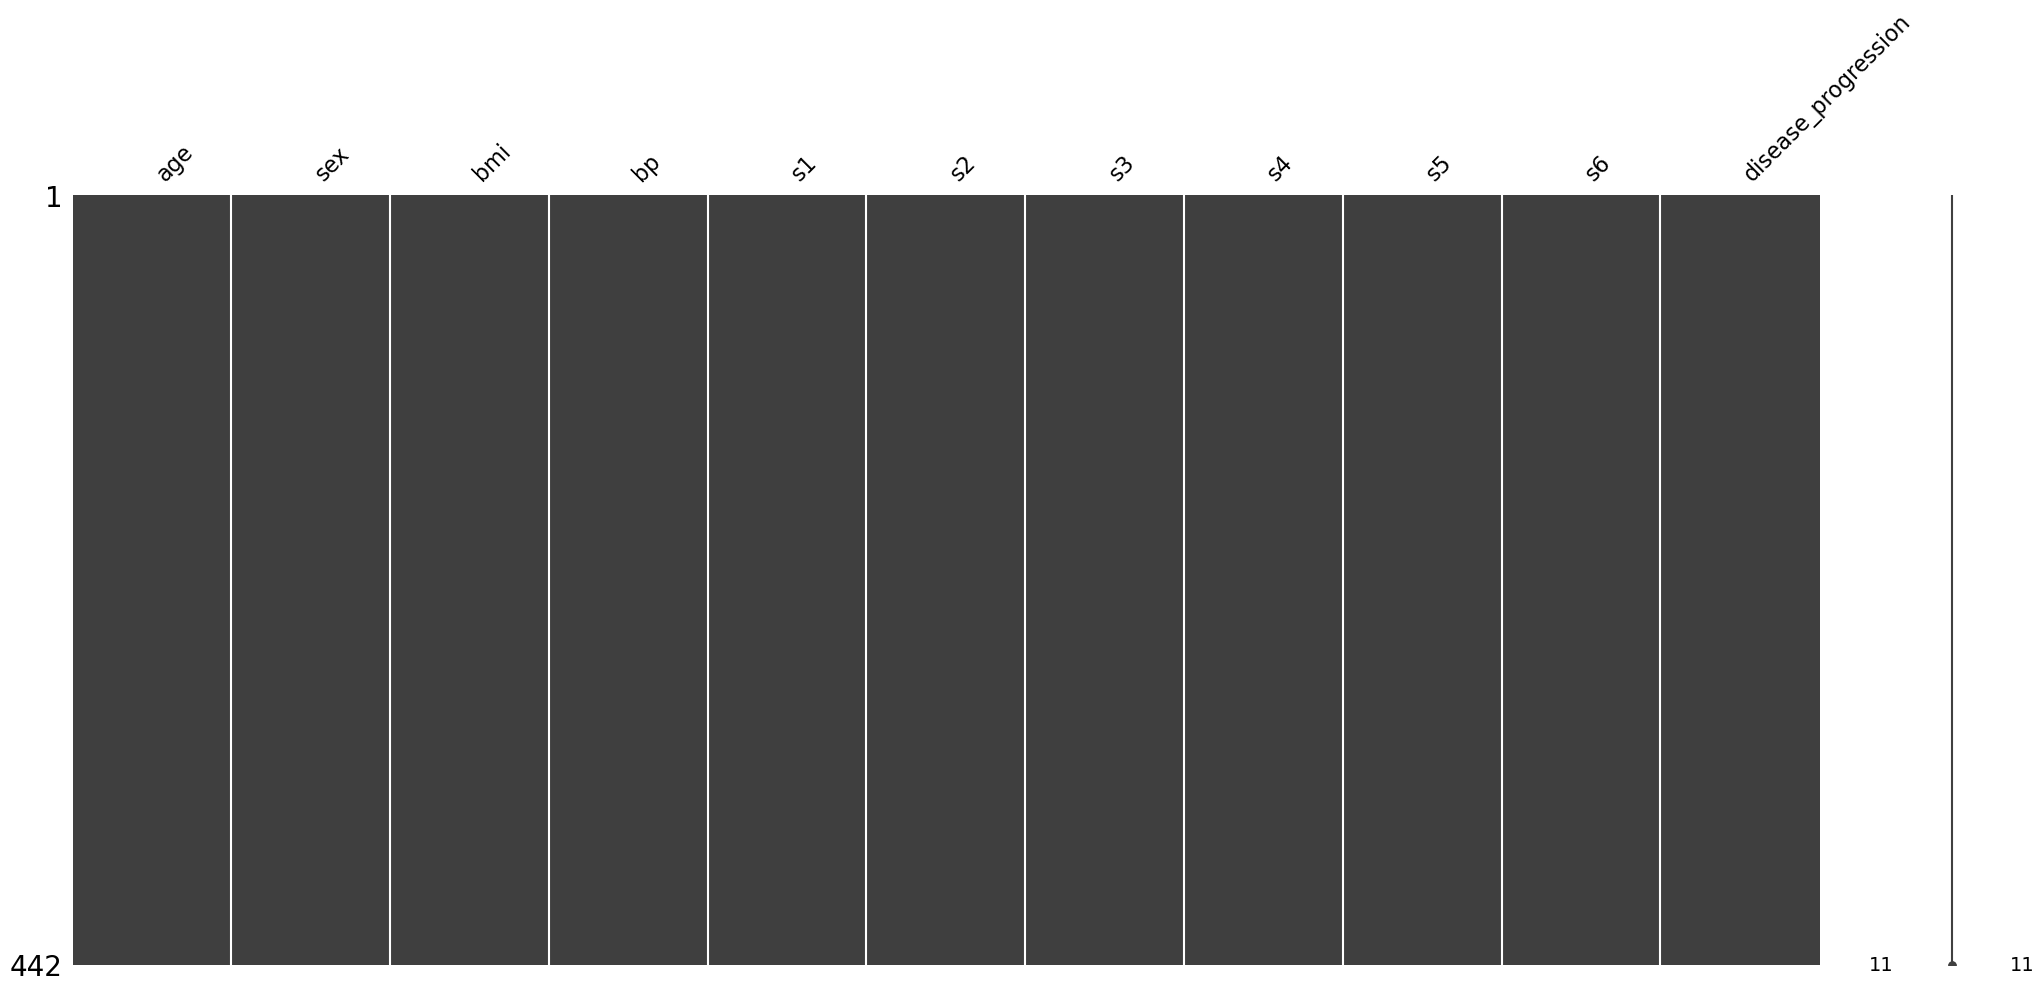

In [9]:
msno.matrix(df)

Le dataset ne contient aucune valeur manquante
## Séparation train/ test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=42)

## Modèle de régression

In [13]:
def regression(X_train, X_test, y_train, y_test):
    """
    Fonction pour entrainer et évaluer plusieurs modèles de régression
    """
    #dict pour stocker les modèles
    model = {"linear_reg": LinearRegression(),
             "lasso" : Lasso(),
             "decision_tree" : DecisionTreeRegressor(),
             "random_forest" : RandomForestRegressor(),
             "gradient_boost" : GradientBoostingRegressor()    
            }
    for a, b in model.items(): #boucler sur model 
        print(f'{a}') #afficher le nom du modèle
        b.fit(X_train, y_train) #compiler le modèle 
        y_pred = b.predict(X_test) #prédiction 

        #métriques d'évaluation 
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        #afficher les métriques
        print("----------REGRESSION METRICS----------")
        print(f"MAE   (Mean Absolute Error)          : {mae:.4f}")
        print(f"MSE   (Mean Squared Error)           : {mse:.4f}")
        print(f"RMSE  (Root Mean Squared Error)      : {rmse:.4f}")
        print(f"R²    (Coefficient de détermination) : {r2:.4f}")

        #visualiser les métriques
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        axes[0].scatter(y_test, y_pred, alpha=0.6, s=100, edgecolors='k')
        axes[0].plot([y_test.min(), y_test.max()], 
                     [y_test.min(), y_test.max()], 
                     'r--', lw=2, label='Prédiction parfaite')
        axes[0].set_xlabel('Valeur du bien', fontsize=12)
        axes[0].set_ylabel('Valeur prédite', fontsize=12)
        axes[0].set_title('Prédictions vs Valeurs Réelles', fontsize=14, fontweight='bold')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        erreurs = y_test - y_pred
        axes[1].hist(erreurs, bins=20, edgecolor='black', alpha=0.7)
        axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Erreur nulle')
        axes[1].set_xlabel('Erreur de prédiction', fontsize=12)
        axes[1].set_ylabel('Fréquence', fontsize=12)
        axes[1].set_title('Distribution des Erreurs', fontsize=14, fontweight='bold')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

linear_reg
----------REGRESSION METRICS----------
MAE   (Mean Absolute Error)          : 41.9194
MSE   (Mean Squared Error)           : 2821.7510
RMSE  (Root Mean Squared Error)      : 53.1202
R²    (Coefficient de détermination) : 0.4773


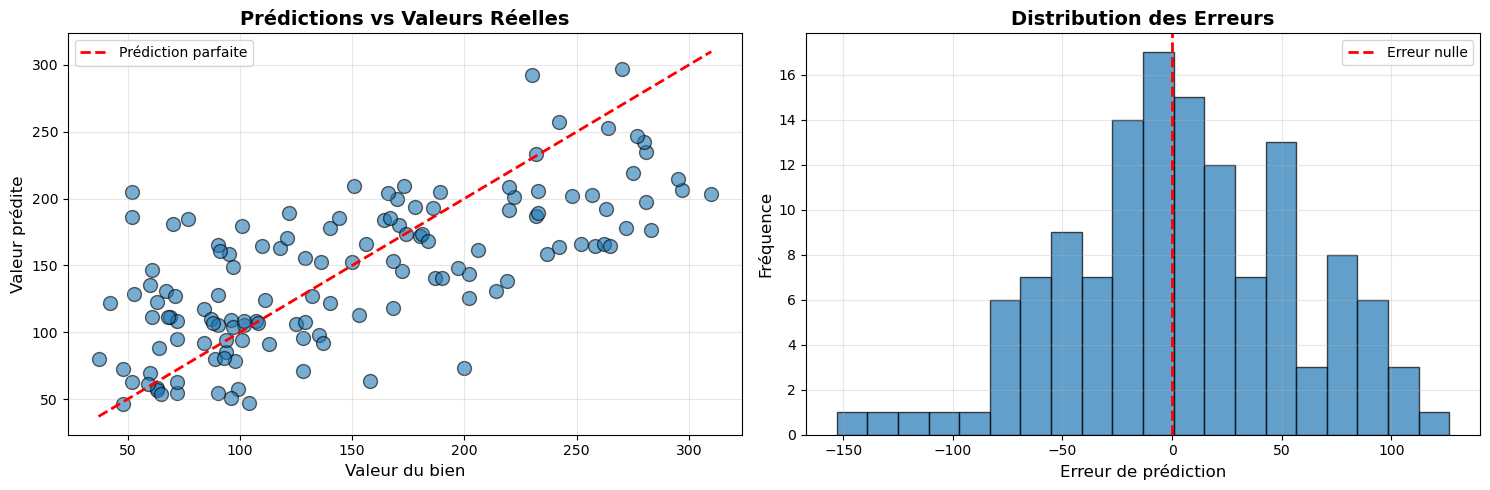

lasso
----------REGRESSION METRICS----------
MAE   (Mean Absolute Error)          : 49.2079
MSE   (Mean Squared Error)           : 3444.6708
RMSE  (Root Mean Squared Error)      : 58.6913
R²    (Coefficient de détermination) : 0.3619


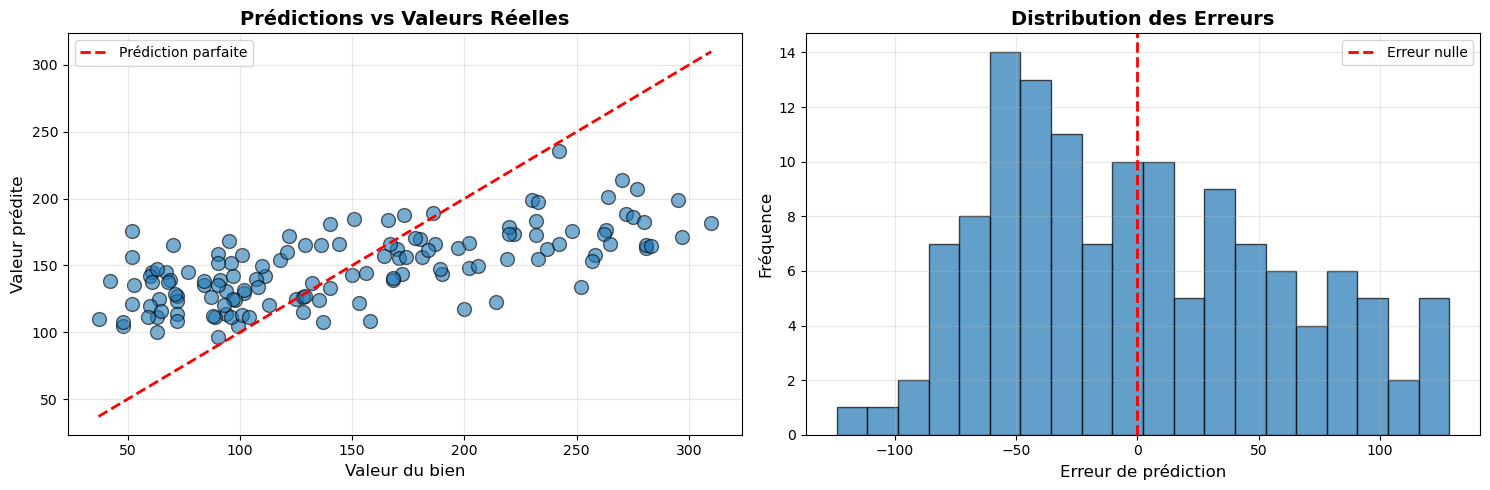

decision_tree
----------REGRESSION METRICS----------
MAE   (Mean Absolute Error)          : 58.3534
MSE   (Mean Squared Error)           : 5486.4436
RMSE  (Root Mean Squared Error)      : 74.0705
R²    (Coefficient de détermination) : -0.0163


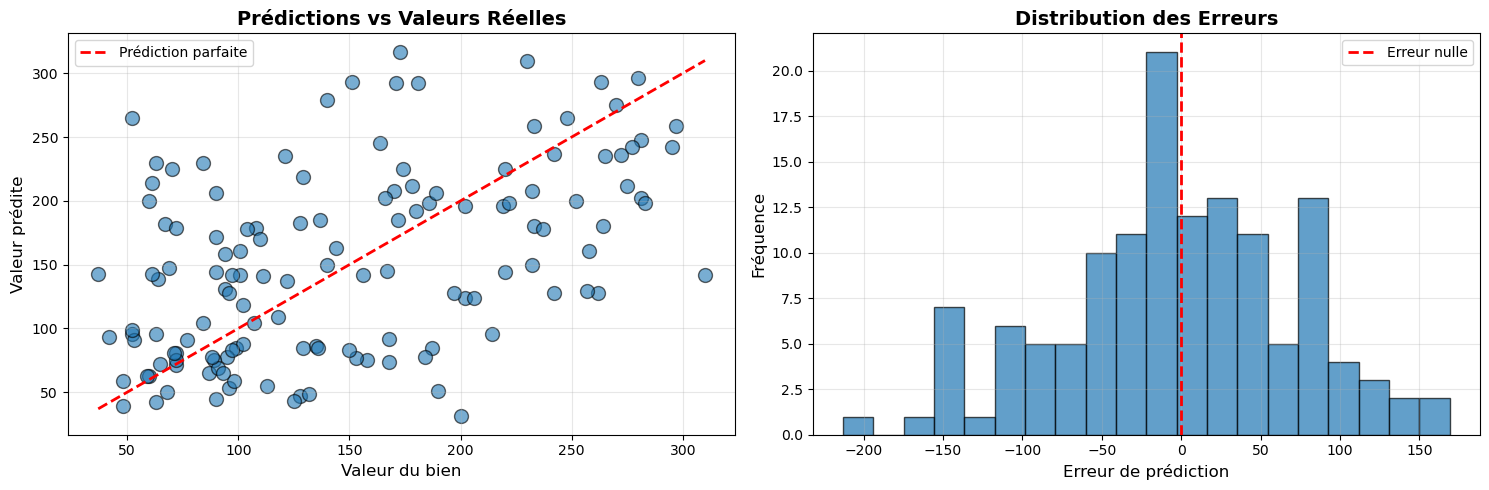

random_forest
----------REGRESSION METRICS----------
MAE   (Mean Absolute Error)          : 43.0524
MSE   (Mean Squared Error)           : 2882.0960
RMSE  (Root Mean Squared Error)      : 53.6852
R²    (Coefficient de détermination) : 0.4661


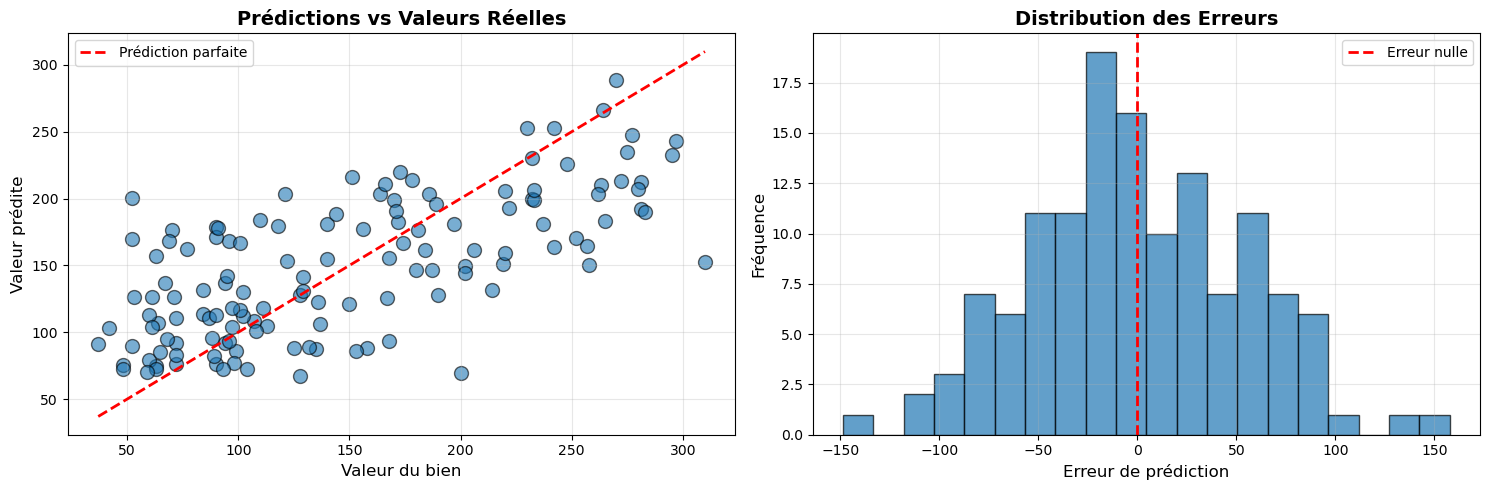

gradient_boost
----------REGRESSION METRICS----------
MAE   (Mean Absolute Error)          : 44.7379
MSE   (Mean Squared Error)           : 3078.1833
RMSE  (Root Mean Squared Error)      : 55.4814
R²    (Coefficient de détermination) : 0.4298


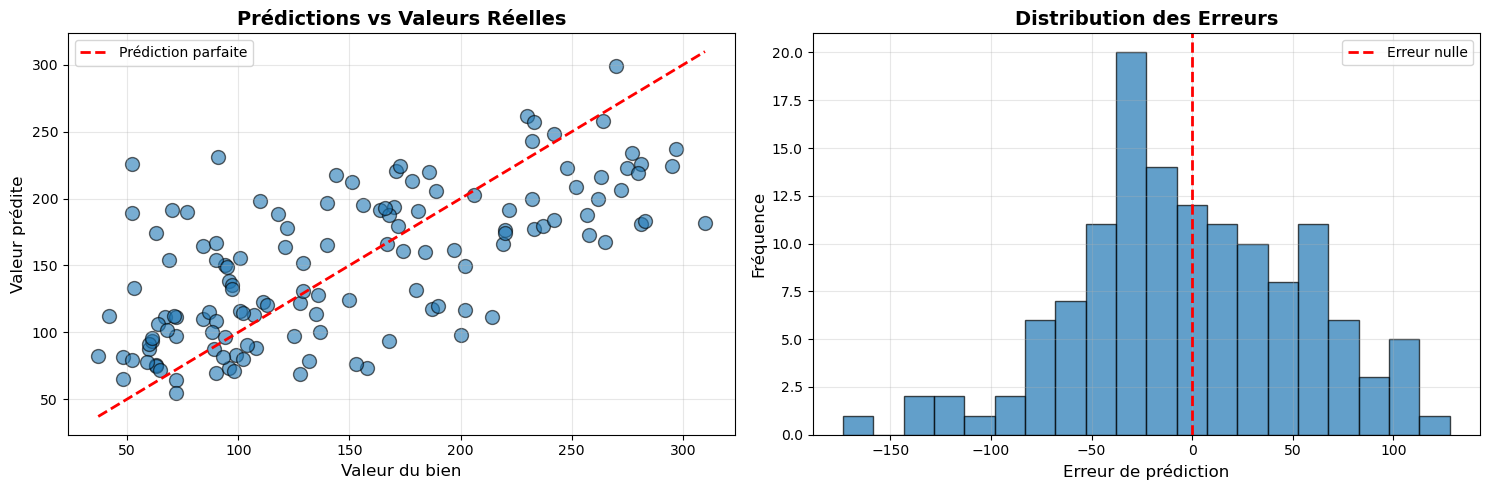

In [14]:
regression(X_train, X_test, y_train, y_test)

## Analyse des résultats
disease_progression est un score quantitatif de progression du diabète, comprise dans ce dataset de 25 à 346. on parlera donc d'unité.
### Régression linéaire 
* En moyenne, le modèle se trompe d'environ 42 unités, c'est une erreur significative, surtout dans un contexte médical
* Si MSE >> MAE² ou RMSE>> MAE : présence de valeurs aberrantes ou grandes erreurs -> ici: MSE(2821) > MAE(1757) , RMSE(53) > MAE(42) ce qui suggère quelques prédictions avec de grosses erreurs
* Le modèle explique environ 48% de la variance : trop peu
* Résultat peu satisfaisant
### Lasso 
* En moyenne, le modèle se trompe de 49 unités, c'est trop
* RMSE > MAE : suggère la présence d'erreurs significatives
* le modèle explique 36% de la variance
* peu performant
### Decision Tree
* En moyenne, le modèle se trompe de 58 unités, c'est significatif
* RMSE > MAE : certaines prédictions sont de grosses erreurs
* le modèle fait pire que le hasard (r2 score négatifs)
* pas performant
### Random Forest Regressor
* En moyenne, le modèle se trompe de 43 unités, c'est bcp trop
* RMSE > MAE, le modèle fait des erreurs significatifs
* Il explique seulement 46% de la variance
* modèle pas performant
### Gradient Boosting 
* Le modèle se trompe de 44 unités en moyenne
* Il explique seulement 42% de la variance
* RMSE> MAE : erreurs significatives
* pas performant

## Conclsuion
Les performances limitées des modèles peuvent s’expliquer par un signal explicatif insuffisant dans les variables disponibles, combiné à une relation complexe et bruitée entre les données cliniques et la progression du diabète. L’absence de prétraitement adapté et de tuning des hyperparamètres empêche par ailleurs les modèles d’exploiter pleinement leur capacité prédictive.